In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('data/csv/freihand_signatures.csv')

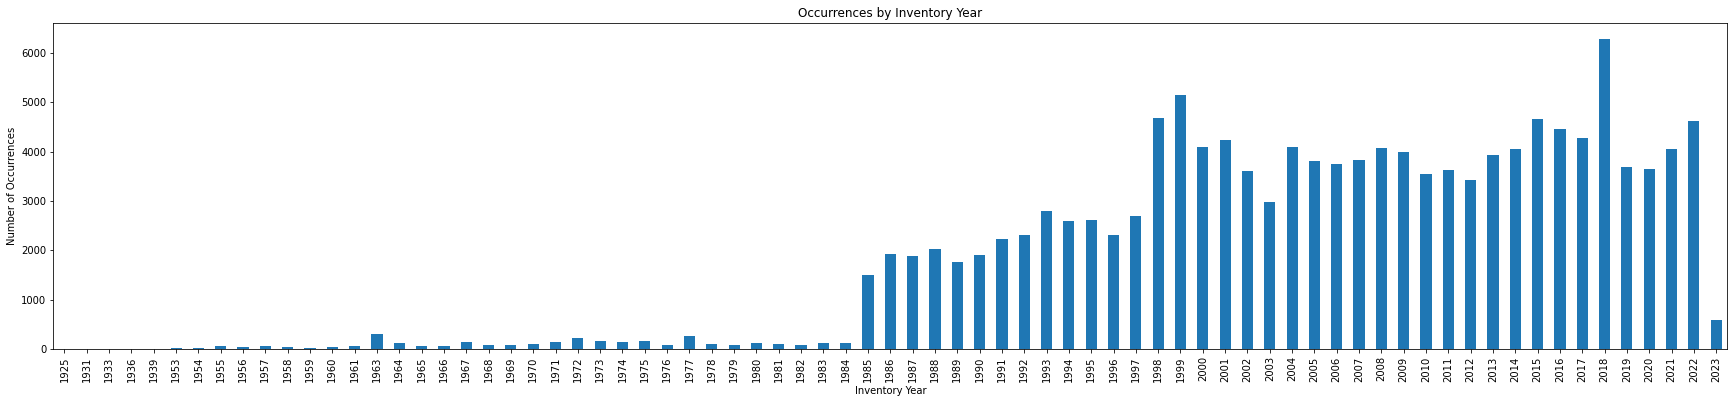

In [12]:
# Group the DataFrame by inventory year and count the occurrences


year_counts = df.groupby('inventory_year').size()

# Plot the year_counts as a bar plot

# Convert the index of the year_counts to integer type
year_counts.index = year_counts.index.astype(int)

year_counts.plot(kind='bar', figsize=(30, 6))
plt.xlabel('Inventory Year')

plt.ylabel('Number of Occurrences')
plt.title('Occurrences by Inventory Year')
plt.show()

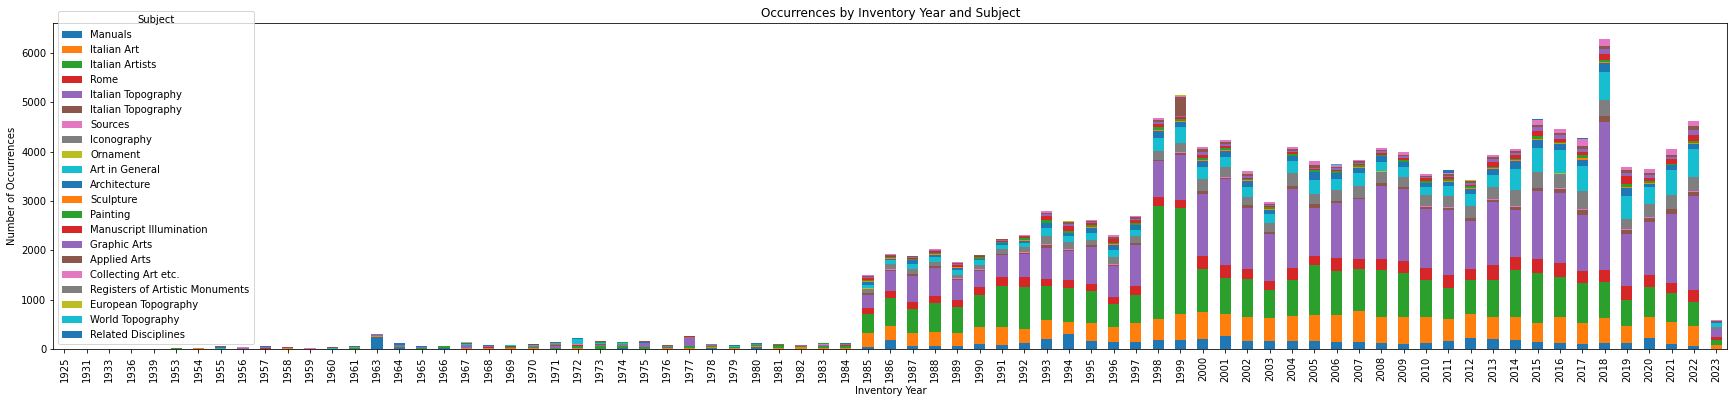

In [13]:

# Group the DataFrame by inventory year and category and count the occurrences
df['Level1'] = df.signature.str[0]
year_counts = df.groupby(['inventory_year', 'Level1']).size().unstack()

subject_dict= {'A': 'Manuals', 'B': 'Italian Art', 'C': 'Italian Artists', 'D': 'Rome','E':'Italian Topography', 'F': 'Italian Topography', 'G': 'Sources', 'H': 'Iconography', 
               'J': 'Ornament', 'M': 'Art in General', 'N': 'Architecture', 'O':'Sculpture', 'P': 'Painting', 'Q': 'Manuscript Illumination', 'R': 'Graphic Arts', 
               'S': 'Applied Arts', 'T': 'Collecting Art etc.', 'U': 'Registers of Artistic Monuments', 'W': 'Non-Italian Artists','X': 'European Topography', 'Y': 'World Topography', 'Z': 'Related Disciplines'}

# Plot the year_counts as a bar plot
ax = year_counts.plot(kind='bar', stacked=True, figsize=(30, 6))
plt.xlabel('Inventory Year')
plt.ylabel('Number of Occurrences')
plt.title('Occurrences by Inventory Year and Subject')
plt.legend(title='Subject')

# Set the legend labels using the category_dict
handles, labels = ax.get_legend_handles_labels()
new_labels = [subject_dict[label] for label in labels]
plt.legend(handles=handles, labels=new_labels, title='Subject')

# Set the x-tick labels to be integers
ax.set_xticklabels(year_counts.index.astype(int))

plt.show()